CHECKLIST

Done: 

- loaded dataset

- labeled imgs with their classes

- retrieved img sizes

- loaded these into a dataframe: img paths, labels, and img size, default vs real world img

- printed basic dataset information: number of classes, number of images

- Plotted dataset information: #images/label, image size distribution

- plot histogram of how many images are in ea. class???

TO DO:

- Answer if images need to be cropped or normalized and how we will preprocess data

QUESTIONS:

- What exactly does plotting example classes of the image mean?

- How do we decide whether to normalize images? What type of normalization would we use?

- How should we be encoding the output labels (one-hot encoding or label encoding)? 

- Should we crop images that have text (i.e. in the bottom right corner)? Should we just use the real world images? 

In [1]:
!pip install kagglehub==0.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import kagglehub
import os
import pandas as pd
from PIL import Image

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version of kaggle dataset
path = kagglehub.dataset_download("alistairking/recyclable-and-household-waste-classification")

print("Path to dataset files:", path)

100%|██████████| 920M/920M [00:06<00:00, 139MB/s]Extracting files...

Path to dataset files: /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1


In [4]:
path

'/root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1'

In [5]:
!ls /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1

images	README.txt


In [6]:
!rm /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1/README.txt

In [7]:
!ls /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1

images


In [8]:
!ls /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1/images/images

aerosol_cans		    office_paper
aluminum_food_cans	    paper_cups
aluminum_soda_cans	    plastic_cup_lids
cardboard_boxes		    plastic_detergent_bottles
cardboard_packaging	    plastic_food_containers
clothing		    plastic_shopping_bags
coffee_grounds		    plastic_soda_bottles
disposable_plastic_cutlery  plastic_straws
eggshells		    plastic_trash_bags
food_waste		    plastic_water_bottles
glass_beverage_bottles	    shoes
glass_cosmetic_containers   steel_food_cans
glass_food_jars		    styrofoam_cups
magazines		    styrofoam_food_containers
newspaper		    tea_bags


# Data Exploration 

(Copied from Canvas): Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, plot example classes of the image, size of images, are sizes uniform? Do they need to be cropped? normalized? etc.

In [9]:
# get img paths and create lists to populate later
class_path = path + '/images' + '/images'
classes = os.listdir(class_path)
print(classes)
image_paths = []
labels = [] # trash category associated w each img
d_r = [] # default (studio/standard) vs real world img

['aerosol_cans', 'aluminum_food_cans', 'aluminum_soda_cans', 'cardboard_boxes', 'cardboard_packaging', 'clothing', 'coffee_grounds', 'disposable_plastic_cutlery', 'eggshells', 'food_waste', 'glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'paper_cups', 'plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_shopping_bags', 'plastic_soda_bottles', 'plastic_straws', 'plastic_trash_bags', 'plastic_water_bottles', 'shoes', 'steel_food_cans', 'styrofoam_cups', 'styrofoam_food_containers', 'tea_bags']


In [10]:
# access img folders and populate lists with needed data
for i, label in enumerate(classes):
    class_dir = os.path.join(class_path, label)
    for subfolder in ['default', 'real_world']:
        subfolder_dir = os.path.join(class_dir, subfolder)
        image_names = os.listdir(subfolder_dir)
        
        for image_name in image_names:
            d_r.append(subfolder)
            image_paths.append(os.path.join(subfolder_dir, image_name))
            labels.append(label)

In [11]:
# get img sizes of every img and populate list
image_sizes = []
for image_path in image_paths:
    im = Image.open(image_path)
    image_sizes.append(im.size)

In [12]:
columnDict = {'image_path': image_paths, 'label': labels, 'image_size': image_sizes, 'default_vs_real_world': d_r}
df = pd.DataFrame(columnDict)

print(df.head())

                                          image_path         label  \
0  /root/.cache/kagglehub/datasets/alistairking/r...  aerosol_cans   
1  /root/.cache/kagglehub/datasets/alistairking/r...  aerosol_cans   
2  /root/.cache/kagglehub/datasets/alistairking/r...  aerosol_cans   
3  /root/.cache/kagglehub/datasets/alistairking/r...  aerosol_cans   
4  /root/.cache/kagglehub/datasets/alistairking/r...  aerosol_cans   

   image_size default_vs_real_world  
0  (256, 256)               default  
1  (256, 256)               default  
2  (256, 256)               default  
3  (256, 256)               default  
4  (256, 256)               default  


In [19]:
print("Number of classes:", len(df['label'].unique()))
print("Number of images:", len(df))
print("Unique image sizes:", df['image_size'].unique())

Number of classes: 30
Number of images: 15000
Unique image sizes: [(256, 256)]


# Plotting Things

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Distribution of image sizes:


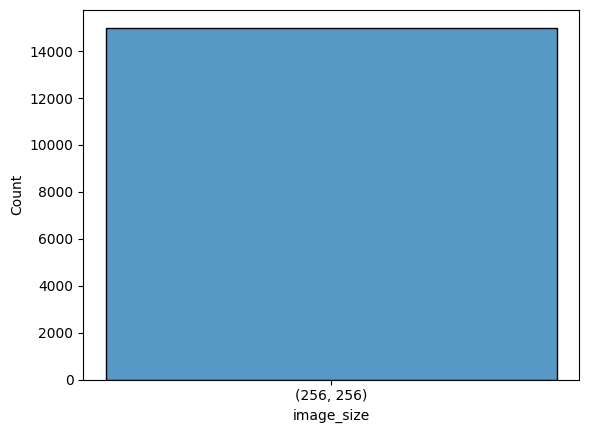

In [14]:
# What an interesting plot!
plottable_df = df.copy()
plottable_df['image_size'] = df['image_size'].astype('string')
print("Distribution of image sizes:")
sns.histplot(data=plottable_df, x ='image_size')
plt.show()

Number of images per class:


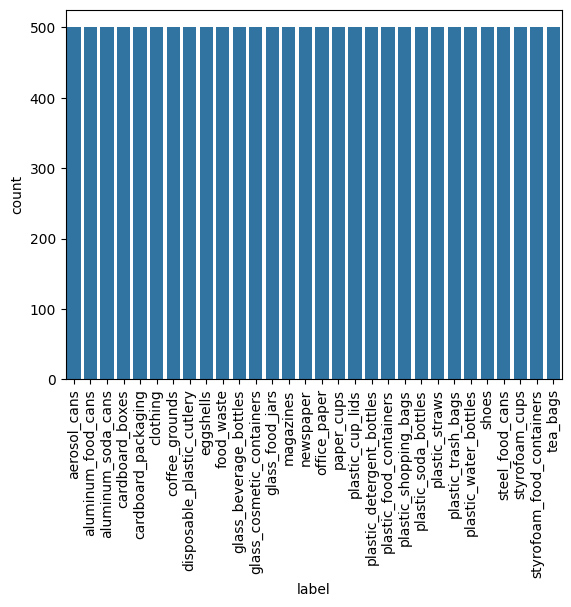

In [22]:
label_counts = plottable_df['label'].value_counts()
tiny_df = pd.DataFrame(label_counts)
print("Number of images per class:")
sns.countplot(data=plottable_df, x ='label')
plt.xticks(rotation=90)
plt.show()

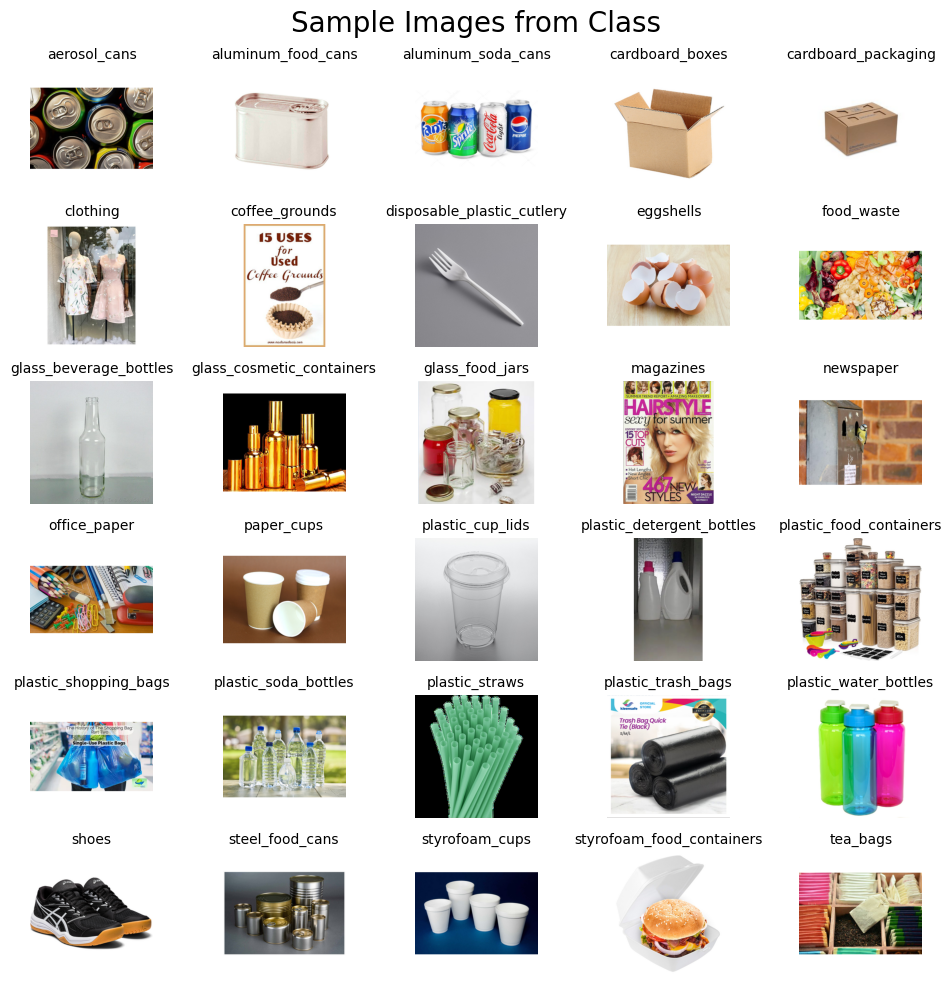

In [21]:
sample = df.groupby('label').sample(n=1).reset_index(drop=True)
num_samples = len(sample)

plt.figure(figsize=(10, 10))
plt.suptitle('Sample Images from Class', fontsize=20) 

for i in range(num_samples):
    img = Image.open(sample.iloc[i]['image_path']) 
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.title(sample.iloc[i]['label'], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

Based on the data exploration conducted above, including the plot of image size distribution and the visualization of sample images, we observe that all images are of the same size (256x256). This uniformity eliminates the need for resizing or cropping to ensure consistent image dimensions. (Answer about normalization as well) 

# Next Steps: More Data Preprocessing 

(Copied from Canvas): How will you preprocess your data? You should explain this in your README.md file and link your Jupyter notebook to it. All code and Jupyter notebooks have be uploaded to your repo.

Answer: 

Our main goal is to classify waste items into three distinct categories: 

- Landfill: Items that are non-recyclable or non-compostable and should be disposed of in landfills. 

- Recyclable: Items that can be recycled, such as plastics, metals, glass, and paper products. 

- Compost: Items that can decompose and be used as compost.  

As a preprocessing step, we plan on combining the existing 30 waste categories into these broader categories. Additionally, we plan on creating a train test split using ONLY the default image data (comprised of studio images and stock photos of trash) for now. We will also apply min-max normalization to keep our image pixel data on a scale between 0 and 1. After normalizing, we will apply a filter to decrease noise in our images (we haven't yet decided on the best option yet, but it'll likely be either a gaussian or median filter).

| label | category/class |
|:------|:---------------|
| `'aerosol_cans'` | if empty recyclable, otherwise landfill |
| `'aluminum_food_cans'` | recyclable |
| `'aluminum_soda_cans'` | recyclable |
| `'cardboard_boxes'` | recyclable |
| `'cardboard_packaging'` | recyclable |
| `'clothing'` | landfill |
| `'coffee_grounds'` | compost |
| `'disposable_plastic_cutlery'` | landfill |
| `'eggshells'` | compost |
| `'food_waste'` | compost |
| `'glass_beverage_bottles'` | recyclable |
| `'glass_cosmetic_containers'` | recyclable |
| `'glass_food_jars'` | recyclable |
| `'magazines'` | recyclable |
| `'newspaper'` | recyclable |
| `'office_paper'` | recyclable |
| `'paper_cups'` | recyclable as long as not wax coated |
| `'plastic_cup_lids'` | recyclable? |
| `'plastic_detergent_bottles'` | recyclable |
| `'plastic_food_containers'` | recyclable |
| `'plastic_shopping_bags'` | landfill |
| `'plastic_soda_bottles'` | recyclable |
| `'plastic_straws'` | recyclable |
| `'plastic_trash_bags'` | landfill |
| `'plastic_water_bottles'` | recyclable |
| `'shoes'` | landfill |
| `'steel_food_cans'` | recyclable |
| `'styrofoam_cups'` | landfill |
| `'styrofoam_food_containers'` | landfill |
| `'tea_bags'` | compost if plastic free |

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bcfc1ee-f9d0-4fbd-8938-ed6b0c0637f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>